In [1]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_network(net, figsize=(10, 10)):
    """
    Visualize a neural network with matplotlib.

    Parameters
    ----------
    net: SimpleFFNN
        The neural network instance to visualize.

    figsize: tuple
        The size of the figure.
    """
    # Create a new figure
    fig, ax = plt.subplots(figsize=figsize)

    # Compute the total number of layers
    n_layers = len(net.weights) + 1

    # Create a list to hold the coordinates of the nodes
    nodes = []

    # Define a color map
    cmap = plt.get_cmap('viridis')

    # Draw the nodes
    for i in range(n_layers):
        # Compute the layer's position
        layer_x = i / (n_layers - 1)

        if i == 0:
            # This is the input layer
            layer_y = np.linspace(0.5 - 0.05*net.weights[0].shape[0], 0.5 + 0.05*net.weights[0].shape[0], net.weights[0].shape[0])
        elif i == n_layers - 1:
            # This is the output layer
            layer_y = np.array([0.5])
        else:
            # This is a hidden layer
            layer_y = np.linspace(0.5 - 0.05*net.weights[i-1].shape[1], 0.5 + 0.05*net.weights[i-1].shape[1], net.weights[i-1].shape[1])

        # Store the node coordinates
        nodes.append(np.c_[layer_x * np.ones_like(layer_y), layer_y])

        # Draw the nodes
        ax.scatter(nodes[-1][:, 0], nodes[-1][:, 1], s=500, zorder=2, 
                   color=cmap(i / (n_layers - 1)), edgecolor='black', linewidth=2, alpha=0.6)

    # Draw the connections
    for i in range(n_layers - 1):
        for start in nodes[i]:
            for end in nodes[i+1]:
                ax.plot([start[0], end[0]], [start[1], end[1]], 'black', zorder=1, linewidth=0.5, alpha=0.5)

    # Remove the axis
    ax.axis('off')

    # Set the aspect of the plot to be equal
    ax.set_aspect('equal')

    return fig, ax


In [2]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return ?

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return ?

class FNN:
    def __init__(self, hidden_layer_sizes=[10], epochs=100, learning_rate=0.1):
        self.hidden_layer_sizes = hidden_layer_sizes
        self.epochs = epochs
        self.learning_rate = learning_rate

    def initialize_weights(self, n_features):
        layer_sizes = [n_features] + self.hidden_layer_sizes + [1]
        weights = []
        biases = []
        sigmas = []
        for i in range(len(layer_sizes) - 1):
            # "he normal initialization"
            std_dev = np.sqrt(2 / layer_sizes[i])
            weights.append(np.random.normal(0.0, std_dev, (layer_sizes[i], layer_sizes[i + 1])))
            biases.append(np.zeros((1, layer_sizes[i + 1])))
            sigmas.append(relu if i < len(self.hidden_layer_sizes) else sigmoid)
        return weights, biases, sigmas

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights, self.biases, self.sigmas = self.initialize_weights(n_features)

        for _ in range(self.epochs):
            # Forward pass
            layer_outputs = [X]
            for w, b, sigma in zip(self.weights, self.biases, self.sigmas):
                z = ?
                layer_outputs.append(?)

            # Backward pass
            # Calculate the error for the output layer
            delta = 
            deltas = 

            # Calculate the errors for the hidden layers
            for l in range(len(self.weights) - 1, 0, -1):
                delta = 
                deltas.insert(0, delta)

            # Update the weights and biases for all layers
            for l in range(len(self.weights)):
                # Derivative of the loss with respect to weights
                weight_gradient = 
                # Derivative of the loss with respect to biases
                bias_gradient = 
                # Update weights and biases
                self.weights[l] -= 
                self.biases[l] -=

    def predict(self, X):

        return 

In [3]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load the digits dataset
digits = datasets.load_digits()

# Preprocess the data
X = digits.images.reshape((len(digits.images), -1))
y = digits.target

# Set target digit
target_digit = 2
y_binary = np.where(y == target_digit, 1, 0)

# Normalize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2)

# Initialize the network
net = FNN([16, 8], epochs=100, learning_rate=0.5)

# Train the network
net.fit(X_train, y_train)

# Predict on the test set
y_pred = net.predict(X_test)
y_pred = y_pred.squeeze()
y_pred = np.where(y_pred > 0.5, 1, 0)


# Compute the accuracy
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy: {accuracy * 100}%")

Accuracy: 98.05555555555556%


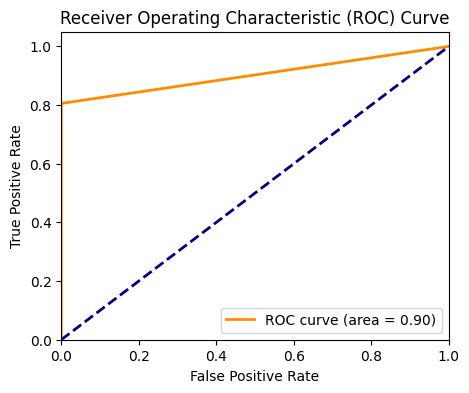

In [4]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

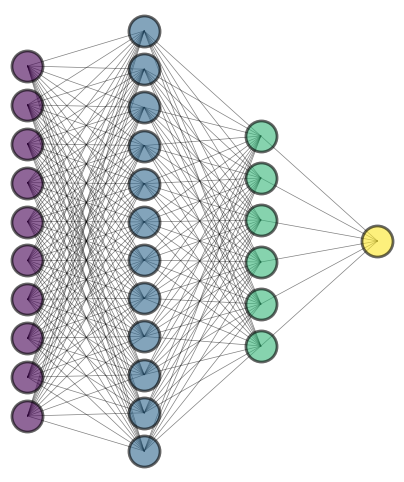

In [5]:
# Network Visualization

from sklearn.datasets import make_classification

# Generate a 10D dataset
X, y = make_classification(n_samples=200, n_features=10, n_informative=10, n_redundant=0, random_state=42)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the network
net = FNN([12,6], epochs=1000, learning_rate=0.01)

# Train the network
net.fit(X_train, y_train)

# Visualize the network
fig, _ = visualize_network(net, figsize=(6, 6))
fig.savefig('neural_network.pdf')